In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact

%matplotlib inline

У нас 10 предикторов и одна целевая переменная. 
Известно, что в определенную дату (2018-11-21) произошло изменение, которое должно было повлиять на выручку проекта.

Наша задача - проверить, что именно это изменение повлияло на выручку и сделать оценку насколько именно. 

In [2]:
data = pd.read_csv("ci_example.csv")
print(data.shape)
data.tail(3)

(120, 11)


,y,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
117,21023.11,31979,9496,8021,8301,5480,7495,8538,7922,4741,2257
118,26816.66,35827,9769,8192,8379,5467,7424,8296,7889,4731,2234
119,26027.19,43367,10824,8626,8549,5453,7494,8348,7899,4712,2233


Нужно зафиксировать периоды (до дня изменения и после)

/Users/artemzraev/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    27839.3            278392.99
Prediction (s.d.)         25105.98 (431.1)   251059.78 (4310.96)
99% CI                    [23975.9, 26196.75][239758.97, 261967.54]

Absolute effect (s.d.)    2733.32 (431.1)    27333.21 (4310.96)
99% CI                    [1642.54, 3863.4]  [16425.45, 38634.02]

Relative effect (s.d.)    10.89% (1.72%)     10.89% (1.72%)
99% CI                    [6.54%, 15.39%]    [6.54%, 15.39%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 27839.3. By contrast, in the absence of an
intervention, we would have expected an average response of 25105.98.
The 99% interval of this counterfactual prediction is [23975.9, 26196.75].
Subtr

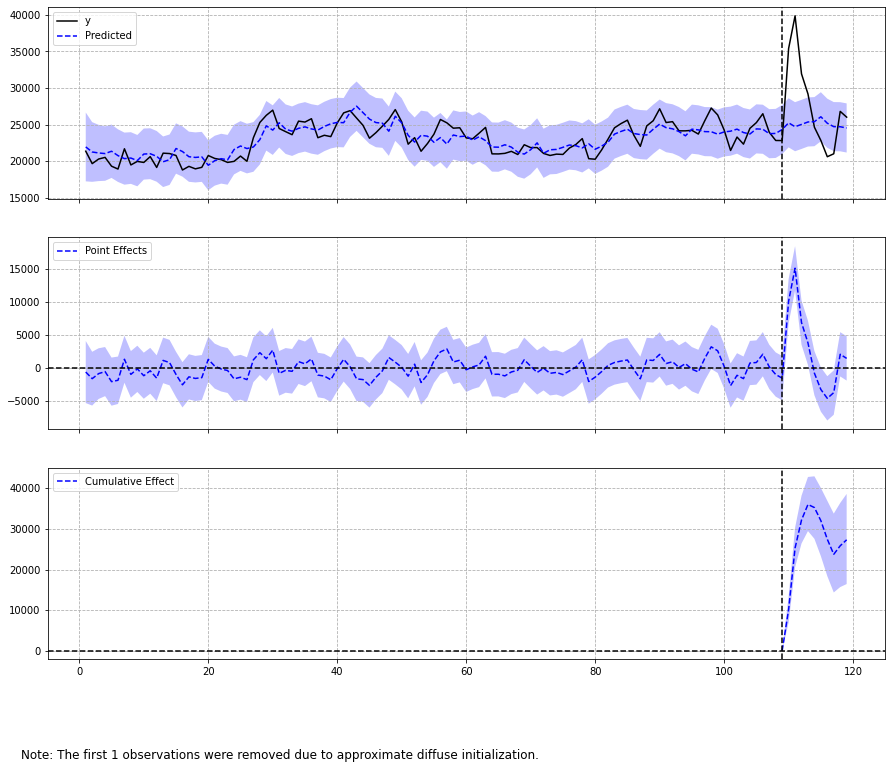

In [5]:
pre_period = [0, 109]
post_period = [110, 119]
ci = CausalImpact(data, pre_period, post_period, alpha=0.01)
print(ci.summary())
print(ci.summary(output='report'))
#p_values[train.iloc[473+i].date] = ci.p_value
print(ci.p_value)
ci.plot()